# Homework 7: Southern Ocean Reentrant Channel
--------------------
### Megan Sharkey
### October 8 2025

--------------------

#### Objective:
In this homework, we will investigate the effect of resolution on transient features and transport quantities using the Southern Ocean Reentrant Channel model.

#### Import Modules:
Begin by importing the modules to read in data, conduct calculations, and make plots.

In [15]:
# import the modules you need here - you may need to add as you go
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm

## Part 1: Modify, Compile and Run the Model

In this assignment, we are going to run the same model we ran in class - but this time, we will run at a resolution which is 10x higher than before. Follow the steps below to get the high resolution model set up.

#### Step 1: Clean Build and Run directories
For this model, we're going to need some clean build and run directories. If you already downloaded everything from the low resolution models in class, you can just remove all of the existing files in your run and bulid directories. Alternatively, you can make new versions e.g.

```
MITgcm/verification/tutorial_reentrant_channel
mkdir build_hires
mkdir run_hires
```

If you choose this option, be sure to replace "build" and "run" in the lines below with these new directories.

#### Step 2: Recompile the model

To compile the model for higher resolution, we're going to need to resize our domain. The new domain size is stored in the `SIZE.h_eddy` file in the code directory. To make this change, move to your code directory and then rename the SIZE.h_eddy file to SIZE.h. Then, in your build directory, compile with MPI.

#### Step 3: Prepare your run directory
To start, per the usual set up, copy everything from input to your run directory and link the `mitgcmuv` from build to run.

Then, on your local machine, run the `gendata.5km.py` script provided with the model input files. This should create the following files:
- SST_relax.5km.bin
- T_relax_mask.5km.bin
- bathy.5km.bin
- temperature.5km.bin
- zonal_wind.5km.bin

In addition, grab the pickup files from Canvas provided with this notebook and upload them to Spartan in your run directory.
  
Make a copy of these files in your run directory on Spartan.

Next, modify the following data* files:

1. Modify the data.pkg file to uncomment the line useGMRedi=.FALSE.,

2. Modify the data file to un/comment the lines for "eddy-permitting run":
- 4 lines in PARM01 
- comment out line for viscAh=2000 in parm01
- deltaT, nTimesteps, monitorFreq in PARM03
- delX and delY in PARM04
- 4x files in PARM05
  
3. Modify the data file to start at iteration 3483648 and run for two years (1 year = 360 days).

4. Modify the data.rbcs file to use the new lines

5. Modify the data.diagnostics file to be the same as that shown in class

#### Run the model
To run the model, you'll need to make a new job script. Consider the following questions:
- How many CPUs (tasks) will you need?

100

- Each node is 28 CPUs. How many nodes will you need?

4

If you are in doubt, send Mike an email.

Note: this model run will take a couple hours!

## Part 2: Surface Conditions
Using your output from the high-resolution model produced by your new model run, make a movie comparing the low resolution model output to the high resolution output. The top row should show the low resolution output, as shown in the movie made in class, and the bottom row should show the fields at an identical timestep from the high resolution model. Be sure to resize and reorganize your plotting code from class to make a well-formatted movie.

In [16]:
# Edit the coding cells here to make your movie


## Part 3: Mean Hydrography
Again using your output from the high-resolution model, create a plot that shows mean properties along the channel ridge. You plot should have 8 panels - the 4 from class in one row, and the 4 from the new model in the bottom row.

In [17]:
# Edit the coding cells here to make your plot


## Part 4: Heat Flux Timeseries
You probably see where this one is going - in this section, re-create your timeseries plot from class for mean temperature and zonal velocity, and total heat flux on a transect across the ridge. Each of the three panels should now have 2 lines - one for the coarse resolution model and one for the high resolution model.

In [18]:
# Edit the coding cells here to make your plot

In [19]:
model_folder = '/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 7/model'
diags = os.path.join(model_folder, 'run', 'Diags')

homework_folder = '/Volumes/T7/ms274/data/homework 7'
diags_hw = os.path.join(homework_folder, 'diags_hw')

In [20]:
# model dimensions
# define the shape of the model grid
n_rows = 40
n_cols = 20
Nr = 49

# define the distances corresponding to the model grid dimensions
dx = 50000
dy = 50000
x = np.arange(0, n_cols*dx, dx)
y = np.arange(0, n_rows*dy, dy)

In [21]:
# read in the hFacW field
hFacW_path = os.path.join(model_folder, 'hFacW.data')
hFacW_file = np.fromfile(hFacW_path, '>f4').reshape((Nr, n_rows, n_cols))

In [22]:
# define the model's meridional grid spacing

#fraction_wet = (len(hFacW_file[0,:,:]!=0)) / (len(hFacW_file[0,:,:]))
meridional_spacing = dy

# define the model's vertical spacing
vertical_spacing = (5.48716549,   6.19462098,   6.99291201,   7.89353689,
         8.90937723,  10.05483267,  11.34595414,  12.80056778,
        14.43837763,  16.28102917,  18.35210877,  20.67704362,
        23.28285446,  26.1976981 ,  29.45012046,  33.06792588,
        37.07656002,  41.496912  ,  46.34247864,  51.61592052,
        57.30518684,  63.37960847,  69.78661289,  76.44996107,
        83.27047568,  90.13003112,  96.89898027, 103.44631852,
       109.65099217, 115.4122275 , 120.65692923, 125.34295968,
       129.45821977, 133.01641219, 136.05088105, 138.60793752,
       140.74074276, 142.50436556, 143.95220912, 145.133724  ,
       146.09317287, 146.86917206, 147.49475454, 147.99774783,
       148.40131516, 148.72455653, 148.98310489, 149.18968055,
       149.35458582,)

In [23]:
### struggling with this section of code
# computing the area

delR = np.asarray(vertical_spacing, float)

# hFacW * delR * dy
area_hFacW = hFacW_file * delR.reshape(-1, 1, 1) * dy  

# wet area per column (sum over depth and rows)
wet_area_per_col = area_hFacW.sum(axis=(0, 2))

# total area for one column (dy * sum(delR) * n_rows)
area_one_col = dy * delR.sum() * n_rows             

# wetness fraction per column 
fraction_per_col = wet_area_per_col / area_one_col  

# total wet area and wetness fraction for each column

print("Wetness by column:")
print("---")

for i in range(n_cols):
    wet_area = wet_area_per_col[i]
    fraction = fraction_per_col[i]
    print("Column", i, "wet area =", wet_area, "m^2", "(wetness fraction =", round(fraction, 4), ")")

# whole transect
total_wet_area = wet_area_per_col.sum()

print("---")
print("Total wet area of entire transect = ", total_wet_area, "m^2")


Wetness by column:
---
Column 0 wet area = 0.0 m^2 (wetness fraction = 0.0 )
Column 1 wet area = 3379526846.0775332 m^2 (wetness fraction = 0.4243 )
Column 2 wet area = 3379526846.0775332 m^2 (wetness fraction = 0.4243 )
Column 3 wet area = 3379526846.0775332 m^2 (wetness fraction = 0.4243 )
Column 4 wet area = 3379526846.0775332 m^2 (wetness fraction = 0.4243 )
Column 5 wet area = 3379526846.0775332 m^2 (wetness fraction = 0.4243 )
Column 6 wet area = 3379526846.0775332 m^2 (wetness fraction = 0.4243 )
Column 7 wet area = 3379526846.0775332 m^2 (wetness fraction = 0.4243 )
Column 8 wet area = 3379526846.0775332 m^2 (wetness fraction = 0.4243 )
Column 9 wet area = 3379526846.0775332 m^2 (wetness fraction = 0.4243 )
Column 10 wet area = 3379526846.0775332 m^2 (wetness fraction = 0.4243 )
Column 11 wet area = 3379526846.0775332 m^2 (wetness fraction = 0.4243 )
Column 12 wet area = 3379526846.0775332 m^2 (wetness fraction = 0.4243 )
Column 13 wet area = 3379526846.0775332 m^2 (wetness fra

In [24]:
# choose a column that transects the channel, subset the hfacw area by this column 

col = 10 

hfacw = area_hFacW[:, :, col]

In [25]:
# this code block puts together multiple parts

def read_three_d(model_folder):
    THETA_timeseries = []
    UVEL_timeseries = []
    ADVx_TH_timeseries = []

    delta_t = 1000 #seconds
    seconds_per_day = 86400
    days_per_year = 360
    seconds_per_year = days_per_year * seconds_per_day

    def iteration_number_to_dec_yr(iter_num):
        elapsed_seconds = iter_num * delta_t
        elapsed_years = elapsed_seconds / seconds_per_year
        return elapsed_years

    # iteration range
    start_iter = 873504
    end_iter = 933120
    step = 30 * seconds_per_day // delta_t  # step = every 30 days in model iterations

    for iter_num in range(start_iter, end_iter + 1, step):

        iteration = int(iter_num)
        
        state_monthly_path = os.path.join(diags, 'state_monthly', f'state_monthly.{iteration:010d}.data')
        state_monthly_data = np.fromfile(state_monthly_path, '>f4').reshape((4, Nr, n_rows, n_cols))
        THETA = state_monthly_data[0, :, :, :]
        UVEL  = state_monthly_data[2, :, :, :]
    
        # advx_th
        heat_3d_path = os.path.join(diags, 'heat_3d_monthly', f'heat_3d_monthly.{iteration:010d}.data')
        heat_3d_monthly_data = np.fromfile(heat_3d_path, '>f4').reshape((7,  Nr, n_rows, n_cols))
        ADVx_TH = heat_3d_monthly_data[0, :, :, :]

        # take means of column transect subset 

        theta = THETA[:, :, col]
        theta_mean = np.sum(theta*hfacw)/np.sum(hfacw)

        uvel = UVEL[:, :, col]
        uvel_mean = np.sum(uvel*hfacw)/np.sum(hfacw)

        advx_th = ADVx_TH[:, :, col]
        advx_th_mean = np.sum(advx_th)

        Cp = 3850 # specific heat capacity (J/kg*K)
        rho = 1025 # density (kg/m^3)
        advx_th_mean *= Cp * rho / 1e15 # convert to petawatts (1 PW = 1e15 Watts)

        # append the lists

        THETA_timeseries.append([iteration_number_to_dec_yr(iter_num), theta_mean])
        UVEL_timeseries.append([iteration_number_to_dec_yr(iter_num), uvel_mean])
        ADVx_TH_timeseries.append([iteration_number_to_dec_yr(iter_num), advx_th_mean]) 

    # convert lists to numpy arrays with shape (N, 2)
    THETA_timeseries = np.array(THETA_timeseries)
    UVEL_timeseries = np.array(UVEL_timeseries)
    ADVx_TH_timeseries = np.array(ADVx_TH_timeseries)

    return THETA_timeseries, UVEL_timeseries, ADVx_TH_timeseries


# call function 

THETA_ts, UVEL_ts, ADVx_TH_ts = read_three_d(model_folder)

print("Theta shape:", THETA_ts.shape)      # (N, 2)
print("Uvel shape:", UVEL_ts.shape)        # (N, 2)
print("ADVx_TH shape:", ADVx_TH_ts.shape)  # (N, 2)

# print(ADVx_TH_ts) # sanity check

Theta shape: (24, 2)
Uvel shape: (24, 2)
ADVx_TH shape: (24, 2)


In [26]:
# path to the grid file for high res hfacw 
hFacW_path_hw = os.path.join(homework_folder, 'hFacW.data')

hFacW_hw = np.fromfile(hFacW_path_hw, dtype='>f4').reshape((Nr, 400, 200))

hfacw_hw = hFacW_hw[:, :, col]    # shape (49, 400)

In [27]:
# homework - high resolution version:

def read_three_d_hw(homework_folder):
    THETA_timeseries_hw = []
    UVEL_timeseries_hw = []
    ADVx_TH_timeseries_hw = []

    delta_t = 250 #seconds
    seconds_per_day = 86400
    days_per_year = 360
    seconds_per_year = days_per_year * seconds_per_day

    def iteration_number_to_dec_yr(iter_num):
        elapsed_seconds = iter_num * delta_t
        elapsed_years = elapsed_seconds / seconds_per_year
        return elapsed_years

    # iteration range
    start_iter = 3494016
    end_iter = 3732480
    step = 30 * seconds_per_day // delta_t  # step = every 30 days in model iterations

    for iter_num in range(start_iter, end_iter + 1, step):

        iteration = int(iter_num)
        
        state_monthly_path_hw = os.path.join(diags_hw, 'homework_monthly', f'state_monthly.{iteration:010d}.data')
        state_monthly_data_hw = np.fromfile(state_monthly_path_hw, '>f4').reshape((4, Nr, 400, 200))
        THETA_hw = state_monthly_data_hw[0, :, :, :]
        UVEL_hw  = state_monthly_data_hw[2, :, :, :]
    
        # advx_th
        heat_3d_path_hw = os.path.join(diags_hw, 'homework_heat', f'heat_3d_monthly.{iteration:010d}.data')
        heat_3d_monthly_data_hw = np.fromfile(heat_3d_path_hw, '>f4').reshape((7,  Nr, 400, 200))
        ADVx_TH_hw = heat_3d_monthly_data_hw[0, :, :, :]

        # take means of column transect subset 

        theta_hw = THETA_hw[:, :, col]
        theta_mean_hw = np.sum(theta_hw*hfacw_hw)/np.sum(hfacw_hw)

        uvel_hw = UVEL_hw[:, :, col]
        uvel_mean_hw = np.sum(uvel_hw*hfacw_hw)/np.sum(hfacw_hw)

        advx_th_hw = ADVx_TH_hw[:, :, col]
        advx_th_mean_hw = np.sum(advx_th_hw)

        Cp = 3850 # specific heat capacity (J/kg*K)
        rho = 1025 # density (kg/m^3)
        advx_th_mean_hw *= Cp * rho / 1e15 # convert to petawatts (1 PW = 1e15 Watts)

        # append the lists

        THETA_timeseries_hw.append([iteration_number_to_dec_yr(iter_num), theta_mean_hw])
        UVEL_timeseries_hw.append([iteration_number_to_dec_yr(iter_num), uvel_mean_hw])
        ADVx_TH_timeseries_hw.append([iteration_number_to_dec_yr(iter_num), advx_th_mean_hw]) 

    # convert lists to numpy arrays with shape (N, 2)
    THETA_timeseries_hw = np.array(THETA_timeseries_hw)
    UVEL_timeseries_hw = np.array(UVEL_timeseries_hw)
    ADVx_TH_timeseries_hw = np.array(ADVx_TH_timeseries_hw)

    return THETA_timeseries_hw, UVEL_timeseries_hw, ADVx_TH_timeseries_hw


# call function 

THETA_ts_hw, UVEL_ts_hw, ADVx_TH_ts_hw = read_three_d_hw(homework_folder)

print("Theta shape:", THETA_ts_hw.shape)      # (N, 2)
print("Uvel shape:", UVEL_ts_hw.shape)        # (N, 2)
print("ADVx_TH shape:", ADVx_TH_ts_hw.shape)  # (N, 2)

# print(ADVx_TH_ts_hw) # sanity check

Theta shape: (24, 2)
Uvel shape: (24, 2)
ADVx_TH shape: (24, 2)


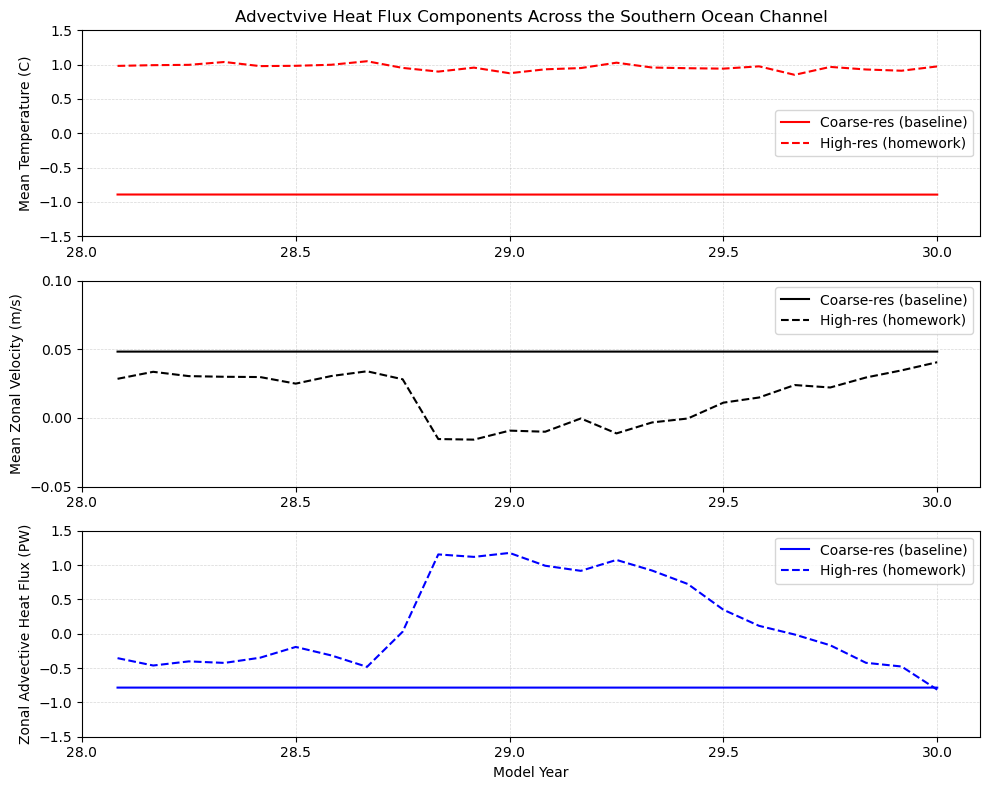

In [28]:
# create your timeseries here
fig = plt.figure(figsize=(10,8))

# theta timeseries
plt.subplot(3, 1, 1)

# plot theta here
plt.plot(THETA_ts[:, 0], THETA_ts[:, 1], 'r-',label='Coarse-res (baseline)')
plt.plot(THETA_ts_hw[:, 0], THETA_ts_hw[:, 1], 'r--',label='High-res (homework)')
plt.ylabel('Mean Temperature (C)')
plt.ylim(-1.5, 1.5) 
plt.yticks(np.arange(-1.5, 1.6, 0.5)) 
plt.title('Advectvive Heat Flux Components Across the Southern Ocean Channel')
plt.xlim(28, 30.1)                                 
plt.xticks(np.arange(28, 30.5, 0.5))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='best')

# uvel timeseries

plt.subplot(3, 1, 2)

plt.plot(UVEL_ts[:, 0],  UVEL_ts[:, 1], 'k-', label='Coarse-res (baseline)')
plt.plot(UVEL_ts_hw[:, 0],  UVEL_ts_hw[:, 1], 'k--',label='High-res (homework)')
plt.ylabel('Mean Zonal Velocity (m/s)')
plt.ylim(-0.05, 0.10)
plt.yticks(np.arange(-0.05, 0.11, 0.05)) 
plt.xlim(28, 30.1)                                
plt.xticks(np.arange(28, 30.5, 0.5)) 
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='best')


# advx_th timeseries
plt.subplot(3, 1, 3)

plt.plot(ADVx_TH_ts[:, 0], ADVx_TH_ts[:, 1], 'b-', label='Coarse-res (baseline)')
plt.plot(ADVx_TH_ts_hw[:, 0], ADVx_TH_ts_hw[:, 1], 'b--',label='High-res (homework)')
plt.ylabel('Zonal Advective Heat Flux (PW)')
plt.ylim(-1.5, 1.5)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel('Model Year')
plt.xlim(28, 30.1)                                 
plt.xticks(np.arange(28, 30.5, 0.5)) 
plt.legend(loc='best')

plt.tight_layout()
plt.show()

## Part 5: Model Differences
In the markdown cell below, write a paragraph describing the differences in the model runs that resulted from changing the resolution. Some key questions to consider:
- What are the key changes to the model output?

With the dimensions of the two models being different (coarse res was 49, 40, 20 ; high res was 49, 400, 200), the high res model outfut shows much more sensitivity in the variables plotted, showing finer scale detail of the same forcings. 

- What causes the variabiliy in the higher resolution model that was not present in the lower resolution model? Note here that the external forcing conditions are identical!

This variability is due to a shorter time-step in the high res model - deltaT was 1000 in the coarse res and 250 in the high res. This increased time step captured much more detail of smaller-scale oceanographic processes. 


- What is consistent between the model runs?

Both model runs use the same code and general setup, and they agree on broad trends. The changes are in the data file and have to do with the deltaT. 

- How well do you think the low resolution model captures the features of the higher resolution model?

Not very well - we can see the disparities in the graphs. The coarse res model misses many fine-scale features and smooths out variability, so it only captures the large-scale picture.

- What generalizations can we make about coarse resolution global ocean models based on this comparison?

Coarse res models gloabl ocean models may be good at representing large-scale analysis, but they can miss key data in global ocean models and can misrepresent smaller, more regionl-scale ocean processes. 

*Edit this markdown cell*